In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from gaussian_mixture import GaussianMixture

In [2]:
n_components = 3
X, y = make_blobs(n_samples=[1000, 3000, 2000], n_features=2, cluster_std=0.6, random_state=0)
#X, y = make_blobs(n_samples=[100, 300, 200], n_features=2, cluster_std=0.1, random_state=0)
X.shape, y.shape

((6000, 2), (6000,))

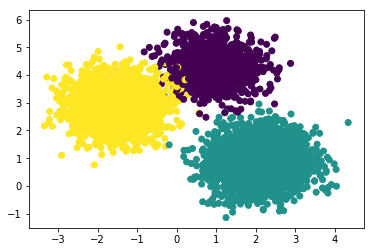

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

initialization at random

In [4]:
gm = GaussianMixture(n_components=n_components, verbose=1)
gm.fit(X)

[step 1] loglike = -21192.63833596241
[step 2] loglike = -21172.52368027837
[step 3] loglike = -21161.018289115316
[step 4] loglike = -21153.114372460157
[step 5] loglike = -21147.59316591941
[step 6] loglike = -21143.679555635164
[step 7] loglike = -21140.867640961937
[step 8] loglike = -21138.82229845337
[step 9] loglike = -21137.31803223493
[step 10] loglike = -21136.200751918754
[step 11] loglike = -21135.36359971897
[step 12] loglike = -21134.731444525773
[step 13] loglike = -21134.25078477327
[step 14] loglike = -21133.883073407214
[step 15] loglike = -21133.600239776926
[step 16] loglike = -21133.381642807068
[step 17] loglike = -21133.21197018826
[step 18] loglike = -21133.079771611126
[step 19] loglike = -21132.976422633175
[step 20] loglike = -21132.895384730342
[step 21] loglike = -21132.83167149463
[step 22] loglike = -21132.78145992092
[step 23] loglike = -21132.741804884055
[step 24] loglike = -21132.710427728834
[step 25] loglike = -21132.685558577854
[step 26] loglike =

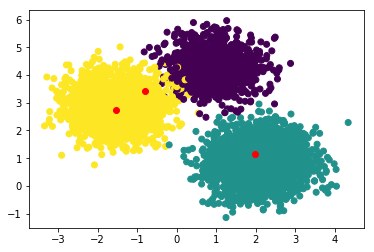

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(gm.mu[:, 0], gm.mu[:, 1], c="red")

initialization by true labels

In [6]:
means_init = np.array([X[np.where(y == i)[0][0]] for i in range(n_components)])
gm = GaussianMixture(n_components=n_components, verbose=1, means_init=means_init)

In [7]:
gm.fit(X)

[step 1] loglike = -20548.13370013453
[step 2] loglike = -20541.252972542577
[step 3] loglike = -20540.760862779684
[step 4] loglike = -20540.720872261125
[step 5] loglike = -20540.71761563727
[step 6] loglike = -20540.717350593695
[step 7] loglike = -20540.71732902725
[step 8] loglike = -20540.7173272725
[step 9] loglike = -20540.71732712973
[step 10] loglike = -20540.717327118116
[step 11] loglike = -20540.71732711717
[step 12] loglike = -20540.71732711709
[step 13] loglike = -20540.717327117083
[step 14] loglike = -20540.717327117083
[step 15] loglike = -20540.717327117083
[step 16] loglike = -20540.717327117083
[step 17] loglike = -20540.717327117083
[step 18] loglike = -20540.717327117083
[step 19] loglike = -20540.717327117083
[step 20] loglike = -20540.717327117083
[step 21] loglike = -20540.717327117083
[step 22] loglike = -20540.717327117083
[step 23] loglike = -20540.717327117083
[step 24] loglike = -20540.717327117083
[step 25] loglike = -20540.717327117083
[step 26] loglike

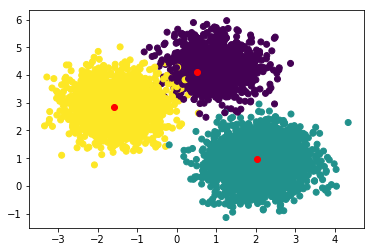

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(gm.mu[:, 0], gm.mu[:, 1], c="red")

using sklearn

initialize at random

In [9]:
from sklearn.mixture import GaussianMixture as GM

In [10]:
gm2 = GM(n_components=3, init_params="random", random_state=0)
gm2.fit(X)
gm2.score(X)

-3.5806737821690864

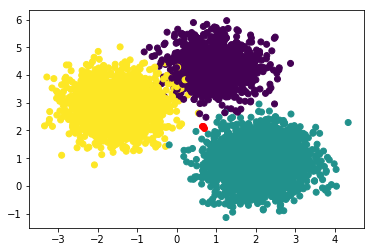

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(gm2.means_[:, 0], gm2.means_[:, 1], c="red")

initialization by k-means

In [12]:
gm2 = GM(n_components=3, init_params="kmeans", random_state=0)
gm2.fit(X)
gm2.score(X)

-2.7951784115343097

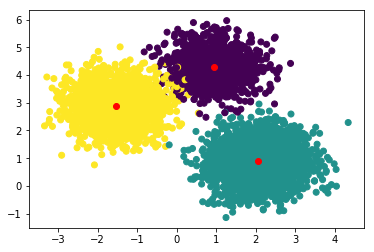

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(gm2.means_[:, 0], gm2.means_[:, 1], c="red")

initialization by true labels

In [14]:
gm2 = GM(n_components=3, means_init=means_init, random_state=0)
gm2.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=array([[ 0.62273269,  4.03470832],
       [ 2.20285577,  1.60859983],
       [-1.69060152,  1.95681108]]),
                n_components=3, n_init=1, precisions_init=None, random_state=0,
                reg_covar=1e-06, tol=0.001, verbose=0, verbose_interval=10,
                warm_start=False, weights_init=None)

-2.795252051563617

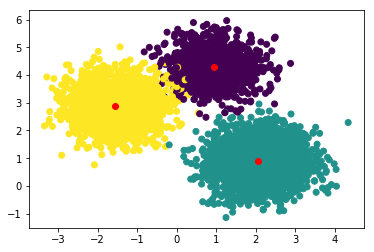

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(gm2.means_[:, 0], gm2.means_[:, 1], c="red")
gm2.score(X)